In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift, ifft2, ifftshift
from skimage import data, color, img_as_float
import imageio

In [2]:
img = img_as_float(color.rgb2gray(data.astronaut()))  # escala de grises


In [6]:
# guarda una imagen en data/my_image.png antes de ejecutar
img = img_as_float(imageio.imread('../data/7.jpg', pilmode='L'))  # L -> grayscale

C:\Users\andre\AppData\Local\Temp\ipykernel_17956\2631637983.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = img_as_float(imageio.imread('../data/7.jpg', pilmode='L'))  # L -> grayscale


In [ ]:
M,N = 256,256
x = np.linspace(0,4*np.pi,N)
y = np.linspace(0,4*np.pi,M)
X,Y = np.meshgrid(x,y)
img = 0.5*(np.sin(5*X) + np.sin(10*Y))  # patrón senoidal
# normalizar a [0,1]
img = (img - img.min()) / (img.max()-img.min())


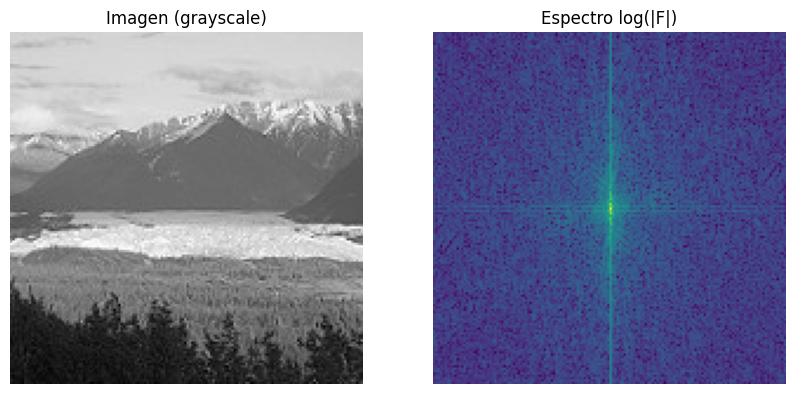

In [7]:
F = fftshift(fft2(img))
S = np.abs(F)
# espectro log para visualización
S_log = np.log1p(S)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Imagen (grayscale)')
ax[0].axis('off')
ax[1].imshow(S_log, cmap='viridis')
ax[1].set_title('Espectro log(|F|)')
ax[1].axis('off')
plt.show()


In [5]:
plt.imsave('../reports/imagen_original.png', img, cmap='gray')
plt.imsave('../reports/espectro_log.png', S_log, cmap='viridis')
